In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import sklearn
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

In [9]:
#To make sure we are taking advantage of GPU when training
len(tf.config.list_physical_devices('GPU'))>0
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [10]:
t=pd.read_csv(r'train.csv')
t.drop('Id',1,inplace=True)

y_train=t['SalePrice']
test=pd.read_csv(r'test.csv')
test.drop('Id',1,inplace=True)

ta=t.iloc[:-1]
df=[ta,test]
train=pd.concat(df,axis=0,ignore_index=True)
pd.set_option('display.max_rows', train.shape[0]+1)
pd.set_option('display.max_columns',train.shape[0]+1)
train.drop('SalePrice',axis=1,inplace=True)

<ipython-input-10-d5ae18c3f41f>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  t.drop('Id',1,inplace=True)
<ipython-input-10-d5ae18c3f41f>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test.drop('Id',1,inplace=True)


In [11]:
#Filling NA values
train['GarageCond'].fillna('NA',inplace=True)
train['GarageQual'].fillna('NA',inplace=True)
train['GarageFinish'].fillna('NA',inplace=True)
train['GarageType'].fillna('NA',inplace=True)
train['FireplaceQu'].fillna('NA',inplace=True)
train['Electrical'].fillna('SBrkr',inplace=True)
train['BsmtQual'].fillna('NA',inplace=True)
train['BsmtCond'].fillna('NA',inplace=True)
train['BsmtExposure'].fillna('NA',inplace=True)
train['BsmtFinType1'].fillna('NA',inplace=True)
train['BsmtFinType2'].fillna('NA',inplace=True)
train['MasVnrType'].fillna('None',inplace=True)
train['MasVnrArea'].fillna('0',inplace=True)
train['GarageYrBlt'].fillna('2022',inplace=True)
train['LotFrontage'].fillna(70.04995836802665,inplace=True)
train['GarageYrBlt']=train['GarageYrBlt'].astype(int)

In [12]:
#Dropping columns
train.drop('MiscFeature',1,inplace=True)
train.drop('Fence',1,inplace=True)
train.drop('PoolQC',1,inplace=True)
train.drop('Alley',1,inplace=True)
train.drop('MoSold',1,inplace=True)

<ipython-input-12-5fc59fe57a4c>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train.drop('MiscFeature',1,inplace=True)
<ipython-input-12-5fc59fe57a4c>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train.drop('Fence',1,inplace=True)
<ipython-input-12-5fc59fe57a4c>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train.drop('PoolQC',1,inplace=True)
<ipython-input-12-5fc59fe57a4c>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train.drop('Alley',1,inplace=True)
<ipython-input-12-5fc59fe57a4c>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train.drop('M

In [13]:
#Dealing with outliers
q1 = np.percentile(train['MSSubClass'], 25)
q3 = np.percentile(train['MSSubClass'], 75)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
train['MSSubClass']= np.where(train['MSSubClass']>upr_bound, upr_bound, train['MSSubClass'])
train['MSSubClass']= np.where(train['MSSubClass']<lwr_bound, lwr_bound, train['MSSubClass'])

q1 = np.percentile(train['YearRemodAdd'], 25)
q3 = np.percentile(train['YearRemodAdd'], 75)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
train['YearRemodAdd']= np.where(train['YearRemodAdd']>upr_bound, upr_bound, train['YearRemodAdd'])
train['YearRemodAdd']= np.where(train['YearRemodAdd']<lwr_bound, lwr_bound, train['YearRemodAdd'])

q1 = np.percentile(train['LowQualFinSF'], 25)
q3 = np.percentile(train['LowQualFinSF'], 75)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
train['LowQualFinSF']= np.where(train['LowQualFinSF']>upr_bound, upr_bound, train['LowQualFinSF'])
train['LowQualFinSF']= np.where(train['LowQualFinSF']<lwr_bound, lwr_bound, train['LowQualFinSF'])

q1 = np.percentile(train['FullBath'], 25)
q3 = np.percentile(train['FullBath'], 75)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
train['FullBath']= np.where(train['FullBath']>upr_bound, upr_bound, train['FullBath'])
train['FullBath']= np.where(train['FullBath']<lwr_bound, lwr_bound, train['FullBath'])

q1 = np.percentile(train['KitchenAbvGr'], 25)
q3 = np.percentile(train['KitchenAbvGr'], 75)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
train['KitchenAbvGr']= np.where(train['KitchenAbvGr']>upr_bound, upr_bound, train['KitchenAbvGr'])
train['KitchenAbvGr']= np.where(train['KitchenAbvGr']<lwr_bound, lwr_bound, train['KitchenAbvGr'])

q1 = np.percentile(train['OpenPorchSF'], 25)
q3 = np.percentile(train['OpenPorchSF'], 75)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
train['OpenPorchSF']= np.where(train['OpenPorchSF']>upr_bound, upr_bound, train['OpenPorchSF'])
train['OpenPorchSF']= np.where(train['OpenPorchSF']<lwr_bound, lwr_bound, train['OpenPorchSF'])

q1 = np.percentile(train['3SsnPorch'], 25)
q3 = np.percentile(train['3SsnPorch'], 75)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
train['3SsnPorch']= np.where(train['3SsnPorch']>upr_bound, upr_bound, train['3SsnPorch'])
train['3SsnPorch']= np.where(train['3SsnPorch']<lwr_bound, lwr_bound, train['3SsnPorch'])

q1 = np.percentile(train['PoolArea'], 25)
q3 = np.percentile(train['PoolArea'], 75)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
train['PoolArea']= np.where(train['PoolArea']>upr_bound, upr_bound, train['PoolArea'])
train['PoolArea']= np.where(train['PoolArea']<lwr_bound, lwr_bound, train['PoolArea'])

q1 = np.percentile(train['MiscVal'], 25)
q3 = np.percentile(train['MiscVal'], 75)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
train['MiscVal']= np.where(train['MiscVal']>upr_bound, upr_bound, train['MiscVal'])
train['MiscVal']= np.where(train['MiscVal']<lwr_bound, lwr_bound, train['MiscVal'])

q1 = np.percentile(train['GarageArea'], 25)
q3 = np.percentile(train['GarageArea'], 75)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
train['GarageArea']= np.where(train['GarageArea']>upr_bound, upr_bound, train['GarageArea'])
train['GarageArea']= np.where(train['GarageArea']<lwr_bound, lwr_bound, train['GarageArea'])

In [14]:
train['MasVnrArea']=train['MasVnrArea'].astype(int)

In [ ]:
#Dropping Columns
train['d_MSZoning']=train['MSZoning'].map(d_MSZoning)
train['d_LandContour']=train['LandContour'].map(d_LandContour)
train['d_LotConfig']=train['LotConfig'].map(d_LotConfig)
train['d_Neighborhood']=train['Neighborhood'].map(d_Neighborhood)
train['d_Condition1']=train['Condition1'].map(d_Condition1)
train['d_Condition2']=train['Condition2'].map(d_Condition2)
train['d_BldgType']=train['BldgType'].map(d_BldgType)
train['d_HouseStyle']=train['HouseStyle'].map(d_HouseStyle)
train['d_RoofStyle']=train['RoofStyle'].map(d_RoofStyle)
train['d_RoofMatl']=train['RoofMatl'].map(d_RoofMatl)
train['d_Exterior1st']=train['Exterior1st'].map(d_Exterior1st)
train['d_Exterior2nd']=train['Exterior2nd'].map(d_Exterior2nd)
train['d_MasVnrType']=train['MasVnrType'].map(d_MasVnrType)
train['d_Foundation']=train['Foundation'].map(d_Foundation)
train['d_Heating']=train['Heating'].map(d_Heating)
train['d_Electrical']=train['Electrical'].map(d_Electrical)
train['d_Functional']=train['Functional'].map(d_Functional)
train['d_GarageType']=train['GarageType'].map(d_GarageType)
train['d_PavedDrive']=train['PavedDrive'].map(d_PavedDrive)
train['d_SaleType']=train['SaleType'].map(d_SaleType)
train['d_SaleCondition']=train['SaleCondition'].map(d_SaleCondition)

train=train.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle'],axis=1)
train=train.drop(['RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','Electrical','Functional', 'GarageType','PavedDrive','SaleType','SaleCondition'], axis=1)

In [ ]:
def ordinal_encoder(data,feature,feature_rank):
    
    ordinal_dict = {}
    
    for i, feature_value in enumerate(feature_rank):
        ordinal_dict[feature_value]=i+1
    
    data[feature] = data[feature].map(lambda x: ordinal_dict[x])
    
    return data

ordinal_encoder(train,'LotShape', ['Reg','IR1','IR2','IR3'])
ordinal_encoder(train,'LandSlope',['Gtl','Mod','Sev'])
ordinal_encoder(train,'ExterQual', ['Ex','Gd','TA','Fa','Po'])
ordinal_encoder(train,'ExterCond',['Ex','Gd','TA','Fa','Po'])
ordinal_encoder(train,'BsmtQual',['Ex','Gd','TA','Fa','Po','NA'])
ordinal_encoder(train,'BsmtCond',['Ex','Gd','TA','Fa','Po','NA'])
ordinal_encoder(train,'BsmtExposure',['Gd','Av','Mn','No','NA'])
ordinal_encoder(train,'BsmtFinType1',['GLQ','ALQ','BLQ','Rec','LwQ','Unf','NA'])
ordinal_encoder(train,'BsmtFinType2',['GLQ','ALQ','BLQ','Rec','LwQ','Unf','NA'])
ordinal_encoder(train,'HeatingQC',['Ex','Gd','TA','Fa','Po','NA'])
ordinal_encoder(train,'FireplaceQu',['Ex','Gd','TA','Fa','Po','NA'])
ordinal_encoder(train,'GarageFinish',['Fin','RFn','Unf','NA'])
ordinal_encoder(train,'GarageQual',['Ex','Gd','TA','Fa','Po','NA'])
ordinal_encoder(train,'GarageCond',['Ex','Gd','TA','Fa','Po','NA'])

,MSSubClass,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,d_Exterior2nd,d_MasVnrType,d_Foundation,d_Heating,d_Electrical,d_Functional,d_GarageType,d_PavedDrive,d_SaleType,d_SaleCondition
0,60.0,65.0,8450,Pave,1,AllPub,1,7,5,2003,...,1014.0,879,1308,2873,2671,2716.0,1722,2640,2524.0,2401
1,20.0,80.0,9600,Pave,1,AllPub,1,6,8,1976,...,447.0,1765,1234,2873,2671,2716.0,1722,2640,2524.0,2401
2,60.0,68.0,11250,Pave,2,AllPub,1,7,5,2001,...,1014.0,879,1308,2873,2671,2716.0,1722,2640,2524.0,2401
3,70.0,60.0,9550,Pave,2,AllPub,1,7,5,1915,...,81.0,1765,311,2873,2671,2716.0,779,2640,2524.0,190
4,60.0,84.0,14260,Pave,2,AllPub,1,8,5,2000,...,1014.0,879,1308,2873,2671,2716.0,1722,2640,2524.0,2401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,145.0,21.0,1936,Pave,1,AllPub,1,4,7,1970,...,126.0,1765,1234,2873,2671,2716.0,157,2640,2524.0,2401
2914,145.0,21.0,1894,Pave,1,AllPub,1,4,5,1970,...,126.0,1765,1234,2873,2671,2716.0,15,2640,2524.0,190
2915,20.0,160.0,20000,Pave,1,AllPub,1,5,7,1960,...,1014.0,1765,1234,2873,2671,2716.0,779,2640,2524.0,190
2916,85.0,62.0,10441,Pave,1,AllPub,1,5,5,1992,...,81.0,1765,1308,2873,2671,2716.0,157,2640,2524.0,2401


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['CentralAir']=le.fit_transform(train['CentralAir'].values)
train['Street']=le.fit_transform(train['Street'].values)

In [ ]:
tr=train.iloc[0:1460]
tes=train.iloc[1460:]
df=[tr,y_train]
tr=pd.concat(df,axis=1,ignore_index=False)
tes.dropna(axis=0,inplace=True)
tes.isna().sum()
tr.dropna(axis=0,inplace=True)
tr.isna().sum()

C:\Users\MOHSEN~1\AppData\Local\Temp/ipykernel_7124/475066146.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes.dropna(axis=0,inplace=True)


MSSubClass         0
LotFrontage        0
LotArea            0
Street             0
LotShape           0
                  ..
d_GarageType       0
d_PavedDrive       0
d_SaleType         0
d_SaleCondition    0
SalePrice          0
Length: 75, dtype: int64

In [ ]:
ordinal_encoder(tr,'KitchenQual',['Ex','Gd','TA','Fa'])
ordinal_encoder(tes,'KitchenQual',['Ex','Gd','TA','Fa'])
ordinal_encoder(tr,'Utilities',['AllPub','NoSeWa'])
ordinal_encoder(tes,'Utilities',['AllPub','NoSeWa'])

C:\Users\MOHSEN~1\AppData\Local\Temp/ipykernel_7124/3829715315.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature] = data[feature].map(lambda x: ordinal_dict[x])


,MSSubClass,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,d_Exterior2nd,d_MasVnrType,d_Foundation,d_Heating,d_Electrical,d_Functional,d_GarageType,d_PavedDrive,d_SaleType,d_SaleCondition
1460,20.0,81.0,14267,1,2,1,1,6,6,1958,...,391.0,879,1234,2873,2671,2716.0,1722,2640,2524.0,2401
1461,60.0,74.0,13830,1,2,1,1,5,5,1997,...,1014.0,1765,1308,2873,2671,2716.0,1722,2640,2524.0,2401
1462,60.0,78.0,9978,1,2,1,1,6,6,1998,...,1014.0,879,1308,2873,2671,2716.0,1722,2640,2524.0,2401
1463,120.0,43.0,5005,1,2,1,1,8,5,1992,...,405.0,1765,1308,2873,2671,2716.0,1722,2640,2524.0,2401
1464,60.0,75.0,10000,1,2,1,1,6,5,1993,...,405.0,1765,1308,2873,2671,2716.0,1722,2640,2524.0,2401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,145.0,21.0,1936,1,1,1,1,4,7,1970,...,126.0,1765,1234,2873,2671,2716.0,157,2640,2524.0,2401
2914,145.0,21.0,1894,1,1,1,1,4,5,1970,...,126.0,1765,1234,2873,2671,2716.0,15,2640,2524.0,190
2915,20.0,160.0,20000,1,1,1,1,5,7,1960,...,1014.0,1765,1234,2873,2671,2716.0,779,2640,2524.0,190
2916,85.0,62.0,10441,1,1,1,1,5,5,1992,...,81.0,1765,1308,2873,2671,2716.0,157,2640,2524.0,2401


In [ ]:
tr=tr.astype(float)
tes=tes.astype(float)
X_train=tr.drop('SalePrice',axis=1)
y_train=tr['SalePrice']

In [ ]:
#We scale the data
from sklearn.preprocessing import MinMaxScaler
ds=MinMaxScaler()
X_train=ds.fit_transform(X_train)
tes=ds.fit_transform(tes)


In [ ]:
#We split our data
from sklearn.model_selection import train_test_split
X_train=pd.DataFrame(X_train)
tes=pd.DataFrame(tes)
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.2, random_state=123)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2, random_state=123)


In [ ]:
#We define our model
from tensorflow.keras import layers
from tensorflow.keras import models
model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_dim=74))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=opt, metrics=['mean_absolute_error','mean_squared_error']) 
model.summary()
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='min', restore_best_weights=False)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               9600      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 19,969
Trainable params: 19,969
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(X_train,y_train,epochs=200,batch_size=128,validation_data=(X_val,y_val),verbose=1, callbacks=[early_stopping_cb])

Epoch 1/200
8/8 [==============================] - 1s 53ms/step - loss: 40082718720.0000 - mean_absolute_error: 182208.7656 - mean_squared_error: 40082718720.0000 - val_loss: 34536546304.0000 - val_mean_absolute_error: 174411.6406 - val_mean_squared_error: 34536546304.0000
Epoch 2/200
8/8 [==============================] - 0s 19ms/step - loss: 39842299904.0000 - mean_absolute_error: 181555.7500 - mean_squared_error: 39842299904.0000 - val_loss: 33882613760.0000 - val_mean_absolute_error: 172544.0000 - val_mean_squared_error: 33882613760.0000
Epoch 3/200
8/8 [==============================] - 0s 18ms/step - loss: 38476836864.0000 - mean_absolute_error: 177821.0156 - mean_squared_error: 38476836864.0000 - val_loss: 31145916416.0000 - val_mean_absolute_error: 164499.8281 - val_mean_squared_error: 31145916416.0000
Epoch 4/200
8/8 [==============================] - 0s 17ms/step - loss: 33873530880.0000 - mean_absolute_error: 164351.4219 - mean_squared_error: 33873530880.0000 - val_loss: 234

In [ ]:
loss, mae, mse= model.evaluate(X_val, y_val, verbose=2)


8/8 - 0s - loss: 1655184640.0000 - mean_absolute_error: 24310.0605 - mean_squared_error: 1655184640.0000 - 76ms/epoch - 9ms/step


Text(0.5, 1.0, 'Train - MAE')

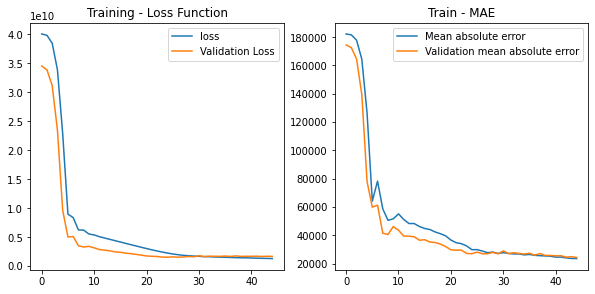

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Mean absolute error')
plt.plot(history.history['val_mean_absolute_error'], label='Validation mean absolute error')
plt.legend()
plt.title('Train - MAE')

10/10 [==============================] - 0s 4ms/step


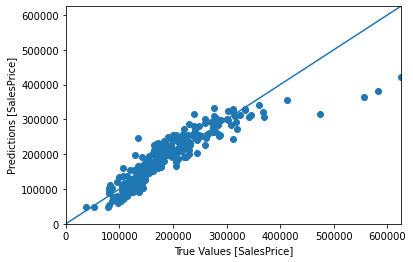

In [ ]:
y_pred_test= model.predict(X_test).flatten()

plt.scatter(y_test, y_pred_test)
plt.xlabel('True Values [SalesPrice]')
plt.ylabel('Predictions [SalesPrice]')

lims=[0, max(y_test)]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

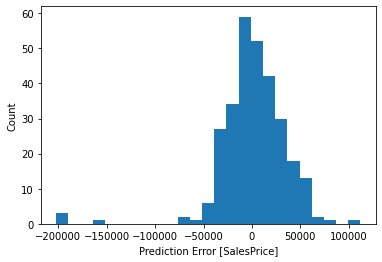

In [ ]:
error= y_pred_test-y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [SalesPrice]')
plt.ylabel('Count')

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y_pred_train= model.predict(X_train).flatten()

print("Training accuracy: ",r2_score(y_train, y_pred_train))

print("Test accuracy: ",r2_score(y_test, y_pred_test))

print("Test mean-squared error: " np.sqrt(mean_squared_error(y_test, y_pred_test)))

30/30 [==============================] - 0s 4ms/step
Accuracy obtained using x_train and x_val sets from the original x!
Training accuracy:  0.8164686459681766
Test accuracy:  0.8013008802829593
Test mean-squared error:  35041.17660317593
